### The Data Generator Code 

This code is used to generate the data that can be used to train the GNN to predict collisions. 

The data consists of features that are obtained from a non-parametric distribution and 

$ d_{i} = \max( r_{safe} - d) $ is used to map the safe distance samples to a dirac function. This in increases the expressive power of the features.  $r_{safe}$ is the minimum saftey distance the robot needs to maintain from the obstacle to consider it safe point. 

In [1]:
import numpy as np
import pandas as pd
import random


In [2]:
numMeans = 1000
colliding_means = np.random.normal( 0.5 , 0.3 , numMeans )
avoiding_means = np.random.normal( 3.5 , 0.6 , numMeans )


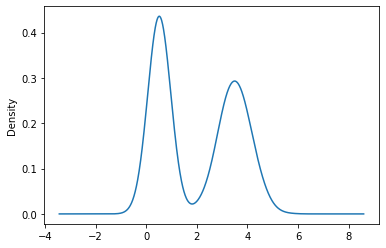

In [3]:
# colliding_means = pd.Series( colliding_means )
# avoiding_means = pd.Series( avoiding_means )
Common = np.zeros( ( 2*numMeans , 1 ) )
Common[0:numMeans , 0] = colliding_means
Common[numMeans:2*numMeans , 0] = avoiding_means
Common = np.reshape( Common , (2*numMeans,) )
Common = pd.Series( Common )

ax = Common.plot.kde()

In [4]:
std = np.array([ 0.1, 0.2, 0.3 ] )
NumCollidingDataPts = 100 ## small data will have 100 large data 1000 
NumAvoidingDataPts = 100 ## small data will have 100 large data 1000 
LenFeature = 20

Data = np.zeros( ( NumCollidingDataPts+NumAvoidingDataPts ,  LenFeature ))
label = [] 

Temp = np.zeros( (LenFeature , 1 ))

for i in range( NumAvoidingDataPts ):
    
    r1 = np.random.randint(0,NumAvoidingDataPts -i )
    data1 = np.random.normal( avoiding_means[i] , 0.1 , 7 )
    data2 = np.random.normal( avoiding_means[i+r1] , 0.2, 8 )
    r2 = np.random.randint(0 , NumAvoidingDataPts -i )
    data3 = np.random.normal( avoiding_means[i+r2] , 0.3 , 5 )
    Temp[0:7 , 0] = data1
    Temp[7:15 , 0] = data2
    Temp[15:20 , 0] = data3
    
    
    Data[i] = np.reshape(Temp , (20,)) 
    label.append( 0 ) 

         
for i in range( NumCollidingDataPts ):
    
    r1 = np.random.randint(0,NumCollidingDataPts -i )
    data1 = np.random.normal( colliding_means[i] , 0.1 , 7 )
    data2 = np.random.normal( colliding_means[i+r1] , 0.2, 8 )
    r2 = np.random.randint(0 , NumCollidingDataPts -i )
    data3 = np.random.normal( colliding_means[i+r2] , 0.3 , 5 )
    Temp[0:7 , 0] = data1
    Temp[7:15 , 0] = data2
    Temp[15:20 , 0] = data3
    
    Data[NumAvoidingDataPts+i]  =  np.reshape(Temp , (20,))  
    label.append( 1 )    

    


In [5]:
Data = np.reshape( Data , ( NumCollidingDataPts+NumAvoidingDataPts ,20 ))
rsafe = 1

In [6]:
indices =random.sample(range( 0, NumCollidingDataPts+NumAvoidingDataPts) , NumCollidingDataPts+NumAvoidingDataPts )
DataFile = open("CollisionData_Max.txt", "w")
Labels = open("Labels_Max.txt", "w")

for i in range(len( indices) ):
    
    Data[indices[i]] = np.maximum( rsafe -Data[indices[i]] , 0 )
    
    print(  Data[indices[i]] )
    
    np.savetxt(DataFile, Data[indices[i]] )
    np.savetxt(Labels,  np.reshape( label[ indices[i] ]  , (1,1) ) )
DataFile.close()
Labels.close()

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[6.26871789e-01 8.18539076e-01 6.02746326e-01 6.91181624e-01
 6.30962449e-01 8.58313928e-01 5.20228321e-01 1.03588622e-03
 0.00000000e+00 0.00000000e+00 1.38944467e-01 7.86983507e-02
 0.00000000e+00 1.99700388e-01 0.00000000e+00 7.98313817e-01
 1.41768789e+00 1.05856332e+00 7.86372972e-01 4.79102885e-01]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.         0.         0.         0.         0.         0.
 0.02848329 0.97316002 0.51826783 0.69981501 0.43532479 0.43849285
 0.39095821 0.48723369 0.39842157 0.72449262 1.0859009  0.9243833
 0.76747959 0.7126606 ]
[0.26705507 0.15284358 0.17470285 0.23268873 0.29173701 0.01608778
 0.13055157 0.1871405  0.         0.43399993 0.16785254 0.29976294
 0.         0.41708735 0.14283173 0.         0.         0.
 0.         0.        ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.46894581 0